
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

** Grupo 28 **<br>
Docente: Laura Montes


*   Gustavo Alvarez Lupu
*   Laura Hayas
*   Maria Emilia Santacruz
*   Nicolás Ambrosis






---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

#### El data frame está definido como df.
Lo primero a realizar es la lectura del **dataset**:

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

# **RESPUESTAS EJERCICIO 1**

#### Cantidad de filas y columnas del dataset:

In [ ]:
df.shape

(6095, 48)

#### Información del dataset como la cantidad de columnas no nulas y el tipo de dato por columna:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   profile_gender                                6095 non-null   object 
 1   profile_age                                   6095 non-null   int64  
 2   work_country                                  6095 non-null   object 
 3   work_province                                 6095 non-null   object 
 4   profile_years_experience                      6095 non-null   float64
 5   work_years_in_company                         6095 non-null   float64
 6   work_years_in_current_position                6095 non-null   float64
 7   work_people_in_charge_of                      6095 non-null   int64  
 8   profile_studies_level                         6095 non-null   object 
 9   profile_studies_level_state                   6095 non-null   o

#### Vista acotada de los datos:




In [ ]:
df.head()

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


#### 1.1 Selección de las columnas relevantes para analizar.

Principalmente se va a enfocar el analisis en las columnas:


*   salary_in_usd
*   salary_monthly_BRUTO
*   tools_programming_languages



In [ ]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_BRUTO', 'salary_in_usd']

#### Inspección de valores de la columna salary_in_usd:




In [ ]:
df.salary_in_usd.unique()

array([nan, 'Mi sueldo está dolarizado'], dtype=object)

#### Se reemplazan los valores nulos en la columna salary_in_usd por *Mi sueldo no está dolarizado*:

In [ ]:
df.salary_in_usd = df.salary_in_usd.fillna('Mi sueldo no está dolarizado')


#### Se comprueba nuevamente los valores únicos de la columna salary_in_usd:

In [ ]:
df.salary_in_usd.unique()

array(['Mi sueldo no está dolarizado', 'Mi sueldo está dolarizado'],
      dtype=object)

#### 1.2 Se plantea la siguiente hipótesis:
**Un salario en dólares es un mejor salario.**

*Tomando que un mejor salario es un mayor salario.*

#### Cantidad de sueldos dolarizados y NO dolarizados:




In [ ]:
#Sueldos dolarizados.

df[df['salary_in_usd'] == 'Mi sueldo está dolarizado'].shape[0]

676

In [ ]:
#Sueldos no dolarizados.


df[df['salary_in_usd'] == 'Mi sueldo no está dolarizado'].shape[0]

5419

#### Como se planteó precedentemente, nuestra hipótesis parte de que un sueldo dolarizado es un mejor salario, entonces se va a analizar esa premisa:

In [ ]:
# De esta manera seteo las opciones, en 2 decimales y se agrega la coma separadora de miles.

pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
#Descripción de la columna salary_monthly_BRUTO sin filtros

df.salary_monthly_BRUTO.describe()

count       6,095.00
mean      124,058.55
std       122,912.35
min             1.00
25%        61,595.00
50%        96,000.00
75%       145,000.00
max     2,180,000.00
Name: salary_monthly_BRUTO, dtype: float64

In [ ]:
#Descripción de salary_monthly_BRUTO agrupado por salary_in_usd:

df['salary_monthly_BRUTO'].groupby(df['salary_in_usd']).describe()

,count,mean,std,min,25%,50%,75%,max
salary_in_usd,,,,,,,,
Mi sueldo está dolarizado,676.00,"261,119.12","225,551.83",2.00,"119,805.00","195,500.00","350,000.00","2,080,000.00"
Mi sueldo no está dolarizado,"5,419.00","106,960.76","89,543.62",1.00,"60,000.00","90,000.00","134,000.00","2,180,000.00"


#### Se agrega un gráfico para una mejor visualización de los datos.

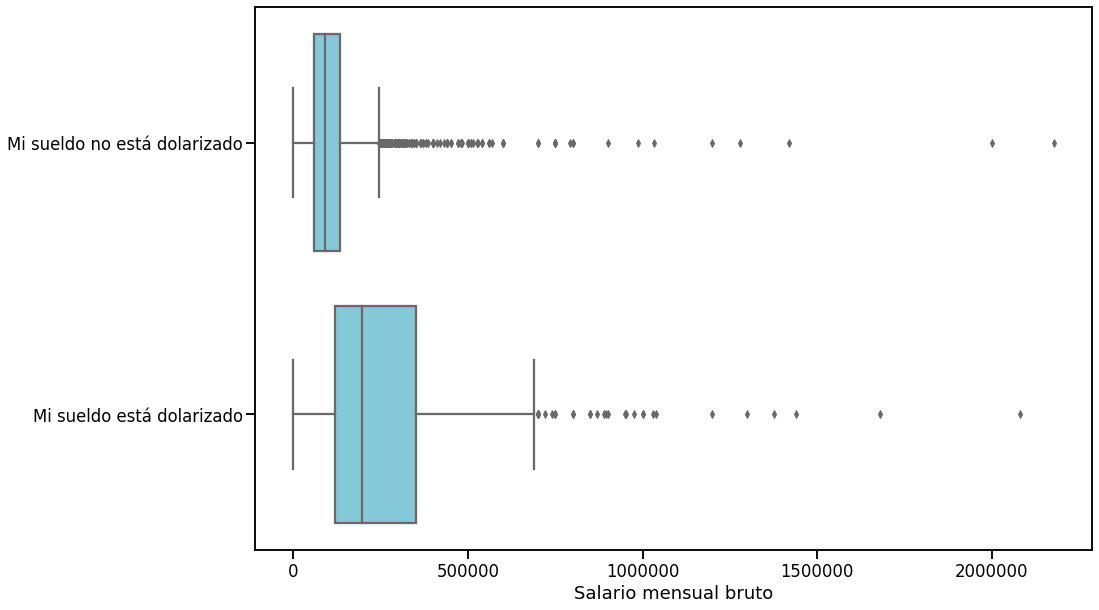

In [ ]:
fig = plt.figure(figsize=(15,10))

seaborn.boxplot(data = df,
                x = 'salary_monthly_BRUTO',
                y = 'salary_in_usd',
                color = '#77d1e6',            
               )

plt.ticklabel_format(style = 'plain',
                     axis = 'x'
                    )

plt.xlabel('Salario mensual bruto')
plt.ylabel('')

plt.show()

#### Observando los datos resultados de la descripción de datos para los 3 casos descritos en la parte de arriba, se encuentra que el sueldo dolarizado es mejor ya que es mayor.

Hay que tener en cuenta que se tienen mínimos demasiados bajos que dan la pauta que pueden haber errores en los datos por ende se van a eliminar valores extremos para tener un análisis más enfocado en valores reales.

Investigando se tiene que el salario mínimo, vital y móvil para el periódo en el que se realizó la encuesta (Octubre 2020) era de $18.900 , por lo que parece un buen parámetro para filtrar el dataset y que sea el mínimo de la columna salary_monthly_BRUTO.
Para el caso de los máximos se considera que existen casos particulares que pueden cobrar esos salarios altos.

A continuación se muestra el código implementando este filtro:


In [ ]:
# Se crea un nuevo dataset con sólo los valores de salario mensual bruto > a $18.900 y <= a $1.000.000

condition_1 = df.salary_monthly_BRUTO > 18900
condition_2 = df.salary_monthly_BRUTO <= 1000000

dfn =df[condition_1 & condition_2]

# Se muestra nuevamente la descripción de los datos agrupados por salario en dólares:

dfn['salary_monthly_BRUTO'].groupby(dfn['salary_in_usd']).describe()

,count,mean,std,min,25%,50%,75%,max
salary_in_usd,,,,,,,,
Mi sueldo está dolarizado,644.00,"256,728.73","183,252.67","20,000.00","120,000.00","200,000.00","350,000.00","1,000,000.00"
Mi sueldo no está dolarizado,"5,204.00","109,504.06","73,507.27","19,925.00","63,000.00","93,000.00","135,523.25","986,840.00"


#### Se observa que la diferencia en los datos es mínima, por lo que los mínimos no generan una afectación de importancia en la descripción de los datos.

#### Se genera un nuevo dataset **utilizando únicamente los salarios en dólares**



In [ ]:
dfusd = dfn.loc[df['salary_in_usd'] == 'Mi sueldo está dolarizado']
dfars = dfn.loc[df['salary_in_usd'] == 'Mi sueldo no está dolarizado']
dfusd

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
14,Hombre,42,Argentina,Córdoba,10.00,0.00,0.00,3,Universitario,Incompleto,...,Jamás,Heterosexual,NaN,NaN,2001-5000,Servicios / Consultoría de Software / Digital,3,7,"Descuentos varios (Mercado Pago, Clarín 365, C...",NaN
25,Mujer,30,Argentina,Ciudad Autónoma de Buenos Aires,12.00,0.00,4.00,14,Universitario,Completado,...,En un trabajo anterior,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,8,4,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
41,Hombre,35,Argentina,Ciudad Autónoma de Buenos Aires,15.00,3.00,1.50,16,Universitario,Incompleto,...,Jamás,Heterosexual,NaN,No,201-500,Producto basado en Software,9,10,"Abono de celular, Capacitaciones y/o cursos, C...","Medallia, auth0, wildlife"
43,Hombre,45,Argentina,Córdoba,29.00,2.00,2.00,0,Universitario,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,9,7,Clases de idiomas,NaN
60,Hombre,50,Argentina,Ciudad Autónoma de Buenos Aires,30.00,4.00,4.00,24,Universitario,Incompleto,...,En un trabajo anterior,¿Qué les importa?,NaN,NaN,1-10,Producto basado en Software,9,6,"Cuota para universidad / posgrados, Horarios f...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6021,Hombre,35,Argentina,Ciudad Autónoma de Buenos Aires,14.00,1.00,8.00,0,Universitario,Completado,...,En un trabajo anterior,Heterosexual,NaN,NaN,201-500,Producto basado en Software,10,10,"Comidas pagas / subvencionadas, Estacionamient...",NaN
6024,Hombre,39,Argentina,Santa Fe,18.00,2.00,2.00,0,Universitario,Completado,...,Jamás,¿Qué les importa?,NaN,NaN,101-200,Producto basado en Software,7,9,"Horarios flexibles, Vacaciones flexibles (adic...",NaN
6079,Hombre,28,Argentina,Provincia de Buenos Aires,2.00,0.00,2.00,0,Universitario,Incompleto,...,Jamás,Heterosexual,NaN,NaN,201-500,Servicios / Consultoría de Software / Digital,10,8,Ninguna de las anteriores,NaN
6080,Hombre,30,Argentina,San Luis,5.00,2.00,2.00,0,Terciario,Incompleto,...,En un trabajo anterior,Heterosexual,NaN,No,501-1000,Servicios / Consultoría de Software / Digital,10,10,"Clases de idiomas, Estacionamiento gratuito / ...","Init ag, Computercenter, DKB, n26"


In [ ]:
dfars

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.00,3.00,3.00,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.00,2.00,2.00,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.00,0.00,0.00,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.00,15.00,13.00,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.00,6.00,6.00,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,13.00,6.00,6.00,0,Terciario,Completado,...,En mi trabajo actual,Heterosexual,NaN,No,501-1000,Otras industrias,7,8,Viáticos,NaN
6091,Hombre,38,Argentina,Ciudad Autónoma de Buenos Aires,12.00,5.00,5.00,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,2001-5000,Otras industrias,8,10,"Abono de celular, Capacitaciones y/o cursos, D...",NaN
6092,Hombre,24,Argentina,Ciudad Autónoma de Buenos Aires,2.00,2.00,2.00,0,Terciario,En curso,...,Jamás,Heterosexual,NaN,NaN,201-500,Producto basado en Software,7,9,"Capacitaciones y/o cursos, Clases de idiomas, ...",Mercado Libre
6093,Hombre,28,Argentina,La Pampa,5.00,3.00,2.00,0,Terciario,En curso,...,Jamás,Heterosexual,NaN,No,51-100,Servicios / Consultoría de Software / Digital,5,7,Capacitaciones y/o cursos,Solo Nubity


### Conteo de frecuencias de los lenguajes de programación de todo el DF

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
dfusd.tools_programming_languages.head()

14    .NET, C#, Delphi, HTML, Java, Javascript, PHP,...
25                                              Ninguno
41                               Bash/Shell, Go, Python
43                                           Bash/Shell
60                                 C, C++, Java, Python
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.



### Separamos los lenguajes de programacion de la dfusd

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
dfusd.loc[:, 'cured_programming_languages'] = dfusd.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
dfusd_lang = dfusd.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(dfusd[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
dfusd_lang[:5]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,programming_language,tools_programming_languages,salary_monthly_BRUTO,salary_in_usd,cured_programming_languages
14,.net,".NET, C#, Delphi, HTML, Java, Javascript, PHP,...","102,000.00",Mi sueldo está dolarizado,"[.net, c#, delphi, html, java, javascript, php..."
14,c#,".NET, C#, Delphi, HTML, Java, Javascript, PHP,...","102,000.00",Mi sueldo está dolarizado,"[.net, c#, delphi, html, java, javascript, php..."
14,delphi,".NET, C#, Delphi, HTML, Java, Javascript, PHP,...","102,000.00",Mi sueldo está dolarizado,"[.net, c#, delphi, html, java, javascript, php..."
14,html,".NET, C#, Delphi, HTML, Java, Javascript, PHP,...","102,000.00",Mi sueldo está dolarizado,"[.net, c#, delphi, html, java, javascript, php..."
14,java,".NET, C#, Delphi, HTML, Java, Javascript, PHP,...","102,000.00",Mi sueldo está dolarizado,"[.net, c#, delphi, html, java, javascript, php..."


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

### Seapramos los lenguajes de programacion en la dfars

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
dfars.loc[:, 'cured_programming_languages'] = dfars.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
dfars_lang = dfars.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(dfars[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
dfars_lang[:5]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,programming_language,tools_programming_languages,salary_monthly_BRUTO,salary_in_usd,cured_programming_languages
0,ninguno,Ninguno,"53,000.00",Mi sueldo no está dolarizado,[ninguno]
1,html,"HTML, Javascript, Python","79,000.00",Mi sueldo no está dolarizado,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python","79,000.00",Mi sueldo no está dolarizado,"[html, javascript, python]"
1,python,"HTML, Javascript, Python","79,000.00",Mi sueldo no está dolarizado,"[html, javascript, python]"
2,ninguno,Ninguno,"160,000.00",Mi sueldo no está dolarizado,[ninguno]


**Selección de los 5 lenguajes de programación con mayor frecuencia**

In [ ]:
usd_language_count = dfusd_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
usd_language_count[:5]

,language,frequency
0,javascript,327
1,html,204
2,python,202
3,sql,180
4,css,150


In [ ]:
ars_language_count = dfars_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
ars_language_count[:5]

,language,frequency
0,javascript,2092
1,sql,1895
2,html,1582
3,java,1287
4,python,1234


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages_usd = ['javascript', 'html','python', 'sql','css' ]
filtered_df_usd_lang = dfusd_lang[dfusd_lang.programming_language.isin(interesting_languages_usd)]

interesting_languages_ars = ['javascript','sql', 'html','java', 'python']
filtered_df_ars_lang = dfars_lang[dfars_lang.programming_language.isin(interesting_languages_ars)]

#filtered_df_lang[:10]

### 1.3 Medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje seleccionado

In [ ]:
filtered_df_usd_lang.groupby(filtered_df_usd_lang['programming_language']).describe()



salary_monthly_BRUTO                                  \
                                    count       mean        std       min   
programming_language                                                        
css                                150.00 253,927.93 188,375.27 20,000.00   
html                               204.00 247,855.26 181,755.62 20,000.00   
javascript                         327.00 259,969.48 178,679.70 20,000.00   
python                             202.00 273,612.77 178,564.57 37,000.00   
sql                                180.00 252,021.14 173,023.28 20,000.00   

                                                                    
                            25%        50%        75%          max  
programming_language                                                
css                  111,750.00 190,000.00 350,000.00   975,000.00  
html                 105,750.00 183,809.50 352,500.00   975,000.00  
javascript           120,000.00 210,000.00 360,000.00   975,000.00  
python               140,250.00 218,000.00 350,000.00 1,000,000.00  
sql                  126,937.50 198,000.00 350,000.00   975,000.00

In [ ]:
filtered_df_ars_lang.groupby(filtered_df_ars_lang['programming_language']).describe()

salary_monthly_BRUTO                                 \
                                    count       mean       std       min   
programming_language                                                       
html                             1,582.00 103,369.10 71,382.22 20,000.00   
java                             1,287.00 126,378.84 84,611.68 19,925.00   
javascript                       2,092.00 110,546.48 74,389.63 20,000.00   
python                           1,234.00 124,576.34 81,468.62 20,000.00   
sql                              1,895.00 108,734.32 76,368.23 20,000.00   

                                                                 
                           25%        50%        75%        max  
programming_language                                             
html                 60,000.00  88,529.00 125,000.00 800,000.00  
java                 71,950.00 110,000.00 158,000.00 986,840.00  
javascript           63,000.00  95,000.00 138,000.00 800,000.00  
python               73,000.00 107,000.00 150,000.00 986,840.00  
sql                  63,000.00  92,000.00 131,650.00 986,840.00

**CONCLUSIONES**<br>
Haciendo un análisis global de las medias de los salarios para cada lenguaje de programcion podemos ver que, tal como era nuestra hipótesis inicial, los salarios dolarizados son mayores a los salarios no dolarizados para todos los lenguajes de programacion analizados (los 5 lenguajes mas frecuentes).<br>
En segundo lugar, puede verse que en ambos grupos el lenguaje más comun es Javascript seguido de HTML y Pyhton.


Comparación gráfica del Salario Bruto por cada Lenguaje de Programación elegido

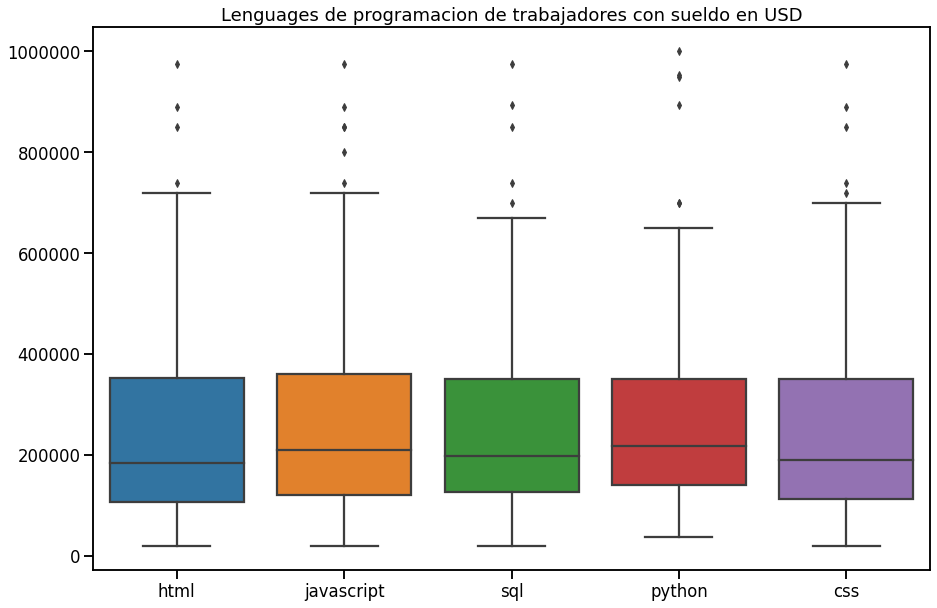

In [ ]:
fig = plt.figure(figsize=(15,10))

seaborn.boxplot(data=filtered_df_usd_lang, x='programming_language', y='salary_monthly_BRUTO')

plt.ticklabel_format(style = 'plain',
                    axis = 'y'
                   )

plt.title('Lenguages de programacion de trabajadores con sueldo en USD')
plt.xlabel('')
plt.ylabel('')

plt.show()

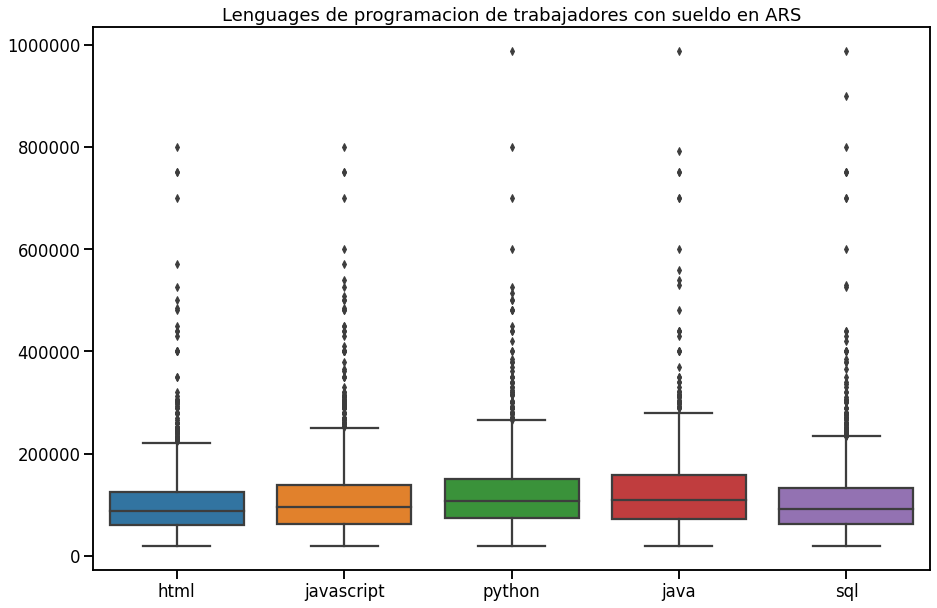

In [ ]:
fig = plt.figure(figsize=(15,10))

seaborn.boxplot(data=filtered_df_ars_lang, x='programming_language', y='salary_monthly_BRUTO')

plt.ticklabel_format(style = 'plain',
                    axis = 'y'
                   )

plt.title('Lenguages de programacion de trabajadores con sueldo en ARS')
plt.xlabel('')
plt.ylabel('')

plt.show()

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

#### 2.1 Selección de las columnas relevamentes para analizar.

Se va a enfocar el analisis en las columnas:


*   salary_monthly_BRUTO
*   tools_programming_languages
*   profile_years_experience



In [ ]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_BRUTO', 'profile_years_experience']

#### Inspección de valores de la columna profile_years_experienced:

In [ ]:
df.profile_years_experience.unique()

array([  3. ,   5. ,   2. ,  15. ,   9. ,   1. ,   0. ,  20. ,  10. ,
         4. ,  11. ,  13. ,  12. ,  16. ,  30. ,  14. ,  29. ,   8. ,
         6. ,  22. ,   1.5,   7. ,  25. ,  27. ,  26. ,  21. ,  17. ,
        31. ,  18. ,  35. ,   2.5,   6.5,  23. ,  24. ,   4.5,  19. ,
        32. ,  34. ,  39. ,   3.7,   3.5,  33. ,  36. ,  40. ,   2.8,
         2.4,   1.8,   1.7,   8.5,   5.5, 115. ,   1.6,  28. ,  37. ,
        43. ,   2.6,   3.1,  44. ,  38. ])

In [ ]:
#Información estadística de la variable
df.profile_years_experience.describe()

count   6,095.00
mean        8.93
std         7.16
min         0.00
25%         3.00
50%         7.00
75%        13.00
max       115.00
Name: profile_years_experience, dtype: float64

(0.0, 115.0)

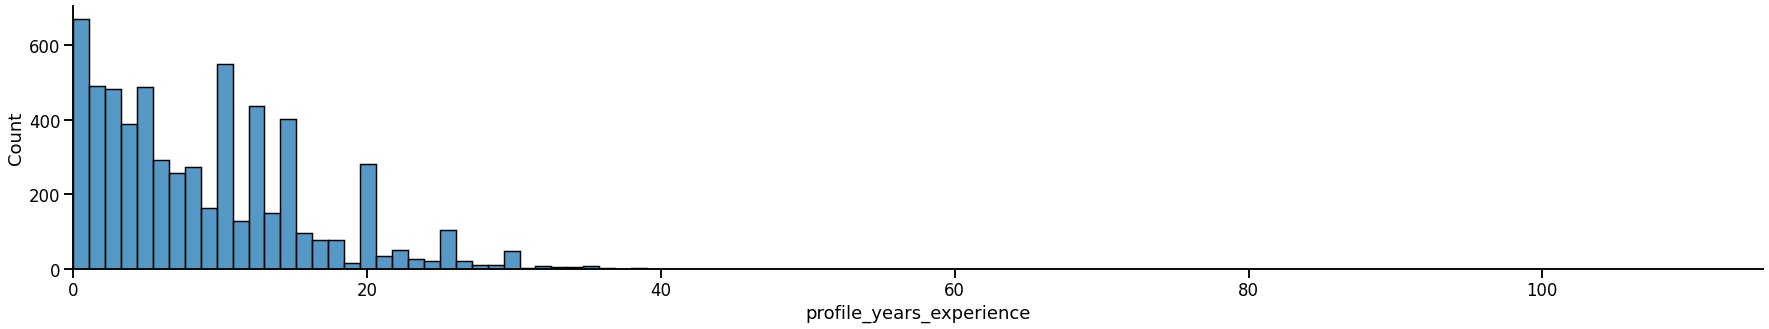

In [ ]:
seaborn.displot(df['profile_years_experience'], aspect=5)
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,115) # definimos los limites de x entre 0 y 115

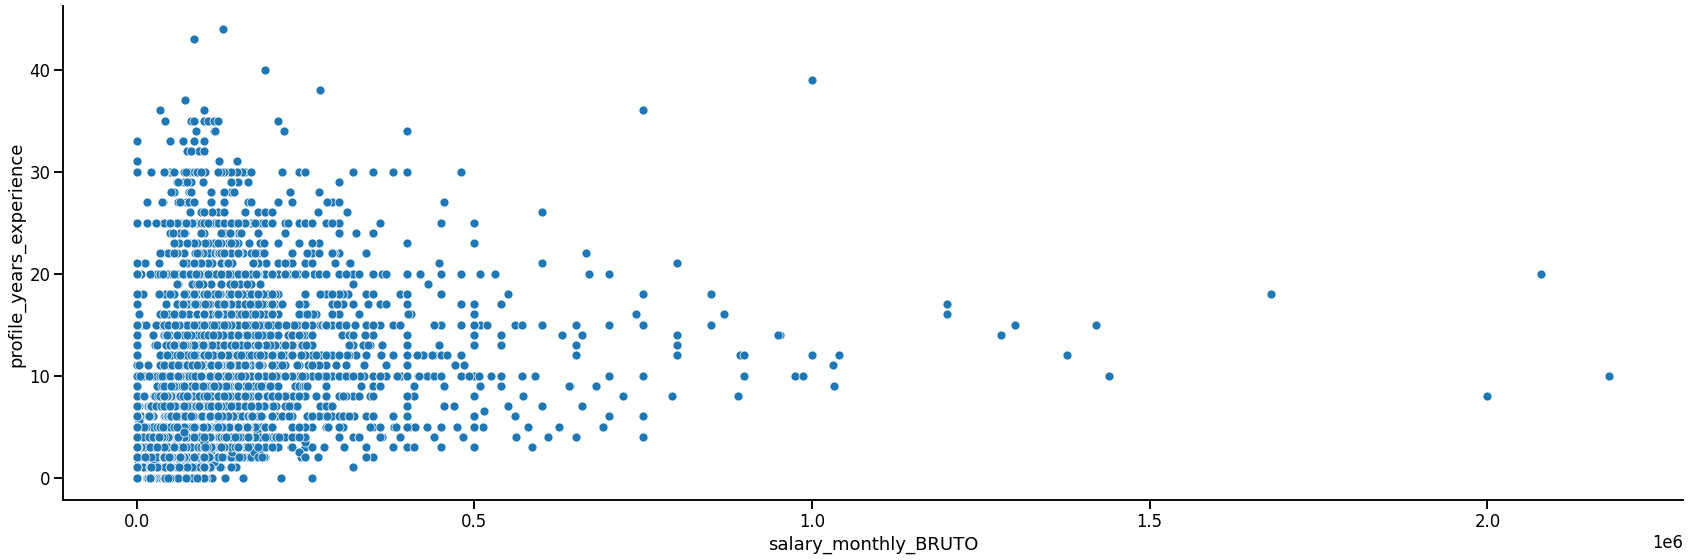

In [ ]:
max_age = 99
seaborn.pairplot(data=df[df.profile_years_experience < max_age],
                 y_vars=['profile_years_experience', ],
                 x_vars=['salary_monthly_BRUTO'],
                 aspect=3, height=8)

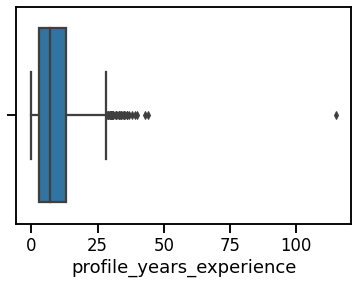

In [ ]:
seaborn.boxplot(data = df, x = 'profile_years_experience')

In [ ]:
# Se crea un nuevo dataset con sólo los valores de años de experiencia <= a 15

dfy = df.loc[df['profile_years_experience'] <= 50]

# Se muestra nuevamente la descripción de los datos:

dfy.profile_years_experience.describe()

count   6,094.00
mean        8.91
std         7.03
min         0.00
25%         3.00
50%         7.00
75%        13.00
max        44.00
Name: profile_years_experience, dtype: float64

Analizamos la distribución de años de experiencia laboral de las personas encuestadas y tomamos la decision de dejar fuera del análisis el unico valor que considerábamos atípico. Por ese motivo definimos un filtro para los años de experiencia en 50 años. De esta manera nos quedamos con el 99.99% de los datos

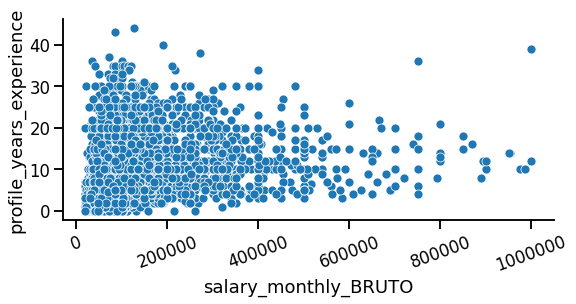

In [ ]:
# Visualización de dispersión de datos para encuestados con hasta 15 años de antiguedad con salario bruto menor o igual a $1.000.000
max_age = 50
df_limpio=df[(df.profile_years_experience <= max_age) & (df.salary_monthly_BRUTO <= 1000000)& (df.salary_monthly_BRUTO > 18900)]
seaborn.pairplot(data=df_limpio, y_vars=['profile_years_experience'],
                 x_vars=['salary_monthly_BRUTO'],
                 aspect=2, height=4)
plt.xticks(rotation=20)

# Remove scietific notation
plt.ticklabel_format(useOffset=False, style='plain')


In [ ]:
df_limpio.describe()

,profile_age,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,salary_on_call_duty_charge,salary_monthly_BRUTO,salary_monthly_NETO,salary_satisfaction,salary_comparison_last_semester,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,company_recommended,company_diversity_policies
count,"5,847.00","5,847.00","5,847.00","5,847.00","5,847.00","5,847.00","5,847.00","5,646.00","5,847.00","5,847.00","5,847.00","5,847.00","5,847.00","5,847.00"
mean,41.60,8.95,3.33,2.88,2.27,566.19,"125,708.47","96,258.42",2.63,2.37,10.51,2.79,7.35,7.62
std,679.69,7.03,4.37,3.41,33.67,"6,570.68","103,087.43","86,662.85",0.85,0.95,12.91,2.84,2.01,2.31
min,18.00,0.00,0.00,0.00,0.00,0.00,"19,925.00",13.00,1.00,1.00,0.00,0.00,1.00,1.00
25%,27.00,3.00,0.00,1.00,0.00,0.00,"65,000.00","54,000.00",2.00,2.00,0.00,0.00,6.00,6.00
50%,32.00,7.00,2.00,2.00,0.00,0.00,"100,000.00","80,000.00",3.00,2.00,7.00,2.00,8.00,8.00
75%,37.00,13.00,4.00,4.00,0.00,0.00,"150,000.00","108,000.00",3.00,3.00,18.00,6.00,9.00,10.00
max,"52,000.00",44.00,43.00,34.00,"2,500.00","300,000.00","1,000,000.00","1,600,000.00",4.00,4.00,100.00,8.00,10.00,10.00


**2.2 Habiendo observado que hay valores extremos dentro de los datos de la variable 'profile_years_experience', vamos a trabajar con el 96% de los datos, es decir con quienes tienen hasta 50 años de experiencia, con salarios brutos menores o iguales a $1.000.000.**

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




# Herramientas visuales para estudiar la distribución y comportamiento de los datos:
- seaborn.pairplot(): Permite visualizar múltiples distribuciones bivariadas. Crea una matriz de ejes y muestra la distribución de cada par de características. 
- pandas.crosstab() => Permite crear una tabla de tabulación cruzada que puede mostrar la frecuencia con la que aparecen ciertos grupos de datos. 


# Selección de 3 VARIABLES NUMÉRICAS:

- salary_monthly_BRUTO
- salary_monthly_NETO
- profile_years_experience

# Selección de 2 VARIABLES CATEGÓRICAS

- profile_gender
- profile_studies_level

#### Inspección de valores de las variables categóricas:

In [ ]:
df_limpio.profile_studies_level.unique()


array(['Universitario', 'Secundario', 'Posgrado', 'Terciario',
       'Doctorado', 'Posdoctorado', 'Primario'], dtype=object)

In [ ]:
df_limpio.profile_gender.unique()

array(['Mujer', 'Hombre', 'Otros'], dtype=object)

**Gráfico de varias variables elegidas**

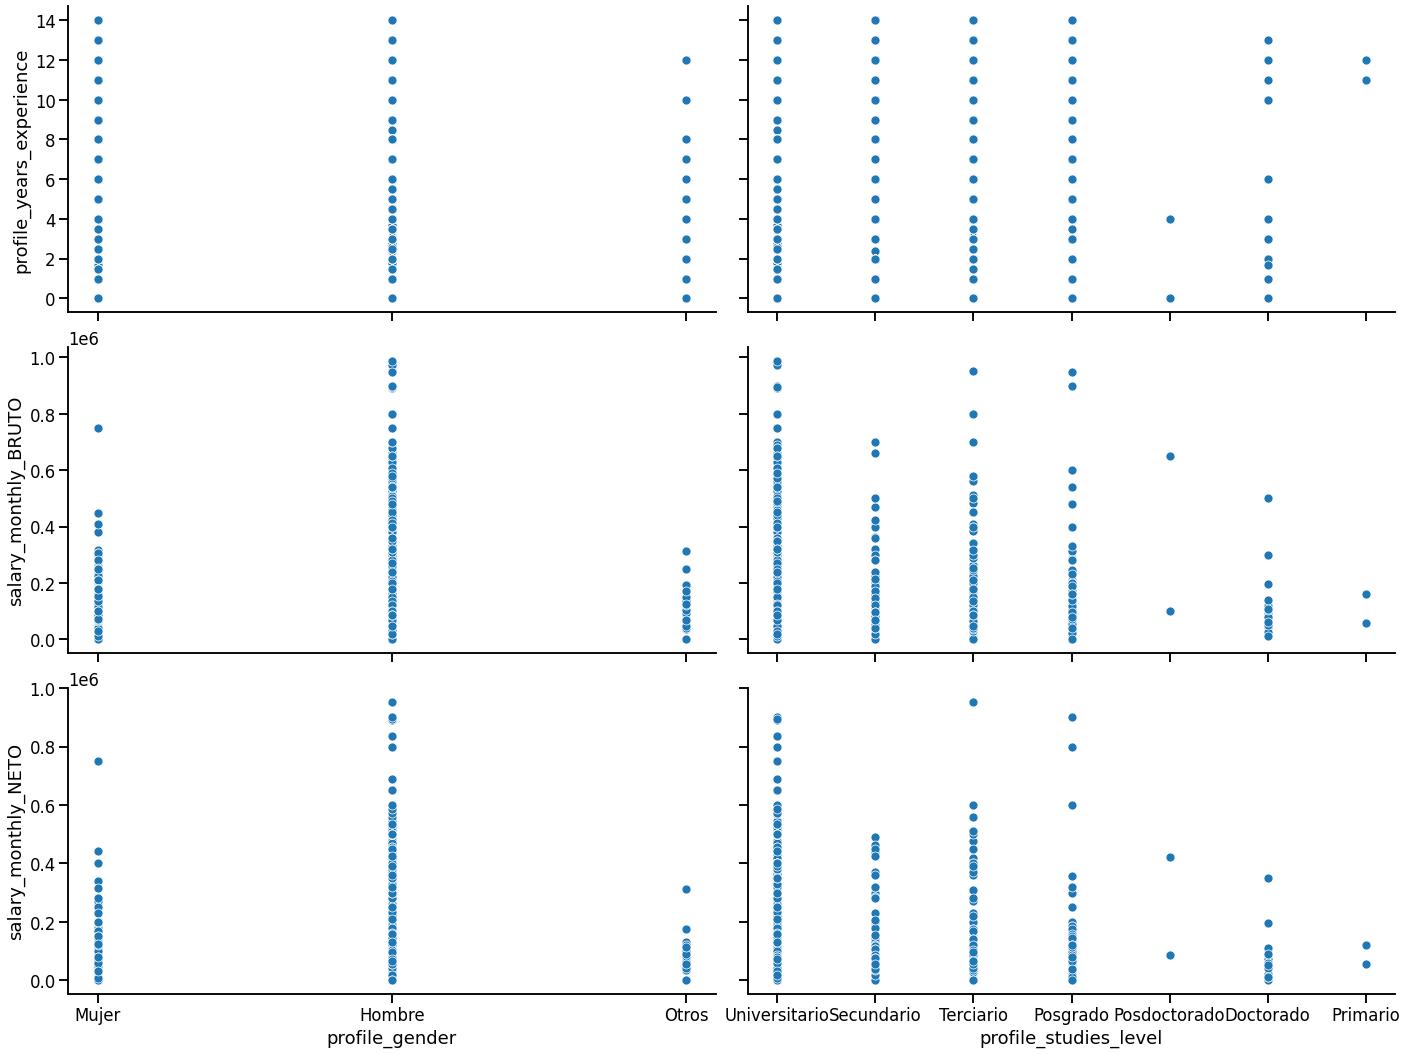

In [ ]:
max_age = 15
seaborn.pairplot(data=df[(df.profile_years_experience < max_age) & (df.salary_monthly_BRUTO < 1000000) & (df.salary_monthly_NETO < 1000000) ],
                 y_vars=['profile_years_experience', 'salary_monthly_BRUTO','salary_monthly_NETO'],
                 x_vars=['profile_gender', 'profile_studies_level'],
                 aspect=2, height=5)


# Análisis de variables categóricas en conjunto

In [ ]:
pd.crosstab(df_limpio.profile_gender, df_limpio.profile_studies_level)


profile_studies_level,Doctorado,Posdoctorado,Posgrado,Primario,Secundario,Terciario,Universitario
profile_gender,,,,,,,
Hombre,18,3,253,2,402,930,3333
Mujer,8,0,80,0,23,146,619
Otros,3,0,1,0,1,6,19


In [ ]:
#Ordenamos lista de nombres de categorías
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado'] 

## Tabla de contingencia normalizada, la suma de los valores da 1, son proporciones, estima probabilidad
pd.crosstab(df_limpio.profile_gender, df_limpio.profile_studies_level, normalize=True)[sorted_studies_levels]

profile_studies_level,Primario,Secundario,Terciario,Universitario,Posgrado,Doctorado,Posdoctorado
profile_gender,,,,,,,
Hombre,0.00,0.07,0.16,0.57,0.04,0.00,0.00
Mujer,0.00,0.00,0.02,0.11,0.01,0.00,0.00
Otros,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Podemos observar que el 83% de los encuestados son Hombres, y a su vez, el 57% son Universitarios. 

# Análisis de variables numéricas 

In [ ]:
## Este gráfico es más útil cuando hay muchos valores en cada variable numérica
## Por ejemplo si solo hubiera eliminado outliers de los años de experiencia

exp = df['profile_years_experience']<=50
sueldo = df['salary_monthly_NETO']<300000
df2 = df[exp & sueldo]

In [ ]:
# La moda en los años de experiencia
profile_years_mode = df2.profile_years_experience.mode()
profile_years_mode

0   10.00
dtype: float64

In [ ]:
# La moda en el salario neto
salary_mode = df2.salary_monthly_NETO.mode()
salary_mode

0   80,000.00
dtype: float64

<Figure size 720x720 with 0 Axes>

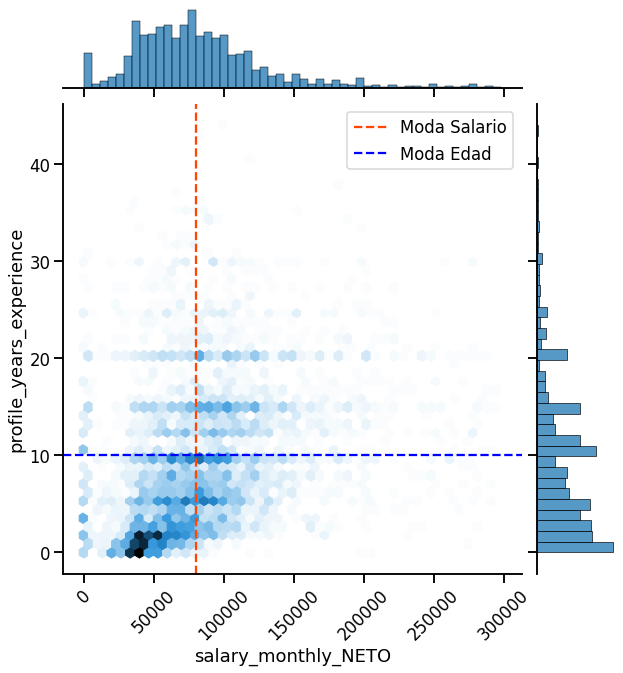

In [ ]:
fig = plt.figure(figsize=(10,10))
seaborn.jointplot(data=df2, x='salary_monthly_NETO',
                  y='profile_years_experience', kind='hex', height=6) 
plt.axvline(salary_mode[0], color='orangered',
            linestyle='--', label='Moda Salario')
plt.axhline(profile_years_mode[0], color='blue',
            linestyle='--', label='Moda Edad')
plt.legend()
# Remove scietific notation
plt.ticklabel_format(useOffset=False, style='plain')

# Label rotation
plt.xticks(rotation=45)
plt.gcf().set_size_inches(10, 10)

Del análisis de la figura anterior podemos observar que existe una correlación positiva entre el salario mensual neto y los años de experiencia. Se aprecia una tendencia de que el salario aumeta con los años de experiencia laboral.<br>
Por otro lado analizamos las modas de estas dos variables. En primer lugar hicimos el cálculo numerico y luego volcamos el resultado en el grafico. Este análisis muestra que los años de experiencia mas comunes son 8 y el salario mas común en $80.000. 

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



### Definición correlación

La correlación es un tipo de asociación entre dos variables numéricas, evalúa la tendencia (creciente o decreciente) en los datos.

Tipos de correlación a partir de valores:


*   0.0 a 0.2: Correlación positiva muy baja.
*   0.2 a 0.4: Correlación positiva baja.
*   0.4 a 0.6: Correlación positiva media.
*   0.6 a 0.8: Correlación positiva alta.
*   0.8 a 1.0: Correlación positiva muy alta.

Para valores negativos, es igual sólo que es correlación negativa.







### Variables: Salario bruto y salario neto.
El salario bruto es el es la cantidad total de dinero que se cobra sin tener en cuenta las deducciones fijadas por ley.

Mientras que el salario neto es la cantidad total de dinero que se cobra con las deducciones ya descontadas, las deducciones pueden variar de acuerdo al monto del salario de la persona, pero como mínimo se va a tener una diferencia del 17%.

Por tal motivo, se debe tener en cuenta que el salario bruto debe ser siempre mayor al salario neto.

###Correlación

Como se describió anteriormente al salario bruto y salario neto, se tiene que entre ambas variables existe una correlación lineal.

Con esta información, se procede a calcular el método de correlación pearson que es específicamente para correlaciones de este tipo.

In [ ]:
#Método de correlación pearson
df[['salary_monthly_BRUTO', 'salary_monthly_NETO']].corr(method='pearson')

,salary_monthly_BRUTO,salary_monthly_NETO
salary_monthly_BRUTO,1.00,0.83
salary_monthly_NETO,0.83,1.00


Se puede observar una correlación de valor 0.83, este indica que se tiene una alta correlación positiva.

Para tener una mejor visualización de la misma se grafica un scatterplot:

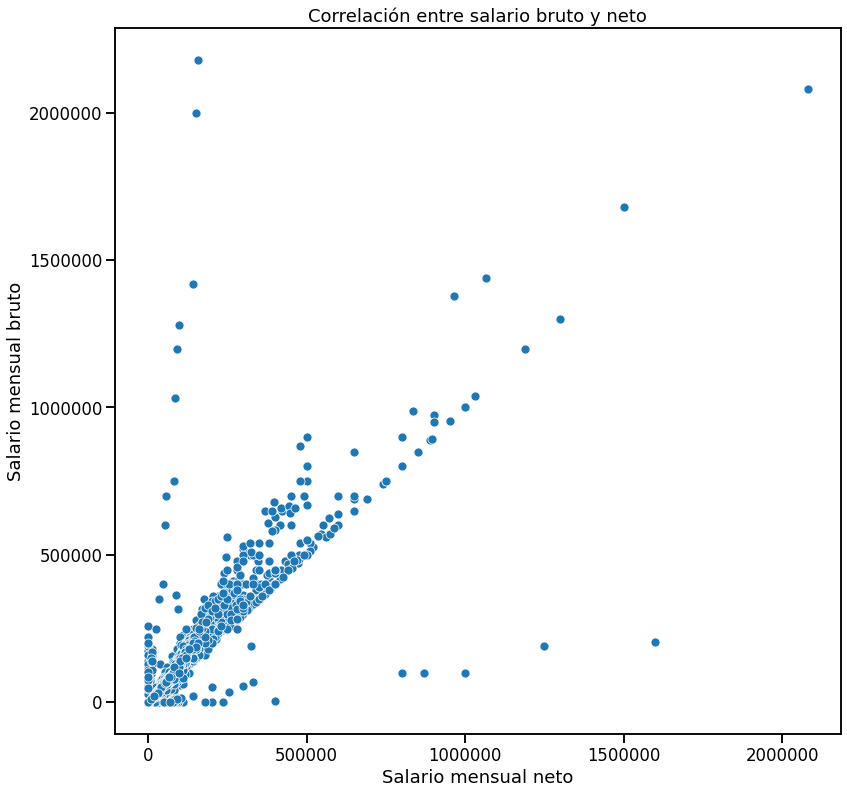

In [ ]:
plt.figure(figsize = [13,13])
seaborn.scatterplot(data=df, y='salary_monthly_BRUTO',
                  x='salary_monthly_NETO')
plt.title('Correlación entre salario bruto y neto')
plt.xlabel('Salario mensual neto')
plt.ylabel('Salario mensual bruto')
plt.ticklabel_format(useOffset=False, style='plain')

A simple vista se puede notar que existe una clara correlación lineal, tal como lo indico el coeficiente de pearson con un valor de 0.83.
Algo a tener en cuenta es la desviación del mismo, debido a diferentes motivos tales como:


*   Desconocimiento de la persona que llenó la encuesta de la diferencia entre salario neto y bruto, de esta manera completaron los datos de manera contraria o con el mismo valor en ambas celdas.
*   Completamiento de sólo un tipo de salario, especificamente el bruto y no el neto, como se puede ver en la línea vertical que se forma en salario mensual neto igual a cero.
*   Errores de tipeo, como por ejemplo falta de un dígito en el salario bruto lo que conlleva a valores debajo de la línea de 45°.

Entre otros posibles errores.

Por tanto, si es posible hacer un análsis aceptable sacando la columna salario bruto.





## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






#### Visualización de la cantidad de datos por nivel de estudio

In [ ]:
df.profile_studies_level.value_counts()

Universitario    4133
Terciario        1135
Secundario        449
Posgrado          342
Doctorado          30
Posdoctorado        4
Primario            2
Name: profile_studies_level, dtype: int64

In [ ]:
df['salary_monthly_NETO'].groupby(dfn['profile_studies_level']).describe()

,count,mean,std,min,25%,50%,75%,max
profile_studies_level,,,,,,,,
Doctorado,28.00,"94,544.44","80,719.48",70.00,"47,861.30","88,950.00","101,250.00","350,000.00"
Posdoctorado,3.00,"206,500.00","187,414.65","87,000.00","98,500.00","110,000.00","266,250.00","422,500.00"
Posgrado,309.00,"122,764.01","92,473.85",62.25,"78,000.00","101,410.00","143,175.00","900,000.00"
Primario,2.00,"87,500.00","45,961.94","55,000.00","71,250.00","87,500.00","103,750.00","120,000.00"
Secundario,412.00,"85,539.79","89,802.08",58.00,"44,875.00","65,750.00","95,000.00","1,250,000.00"
Terciario,"1,054.00","83,418.29","72,587.32",25.00,"49,000.00","70,000.00","95,000.00","1,000,000.00"
Universitario,"3,839.00","98,738.46","88,637.92",13.00,"55,000.00","80,000.00","110,000.00","1,600,000.00"


#### Variables a tener en cuenta

* profile_studies_level
* salary_monthly_NETO

#### Histrograma del salario mensual neto

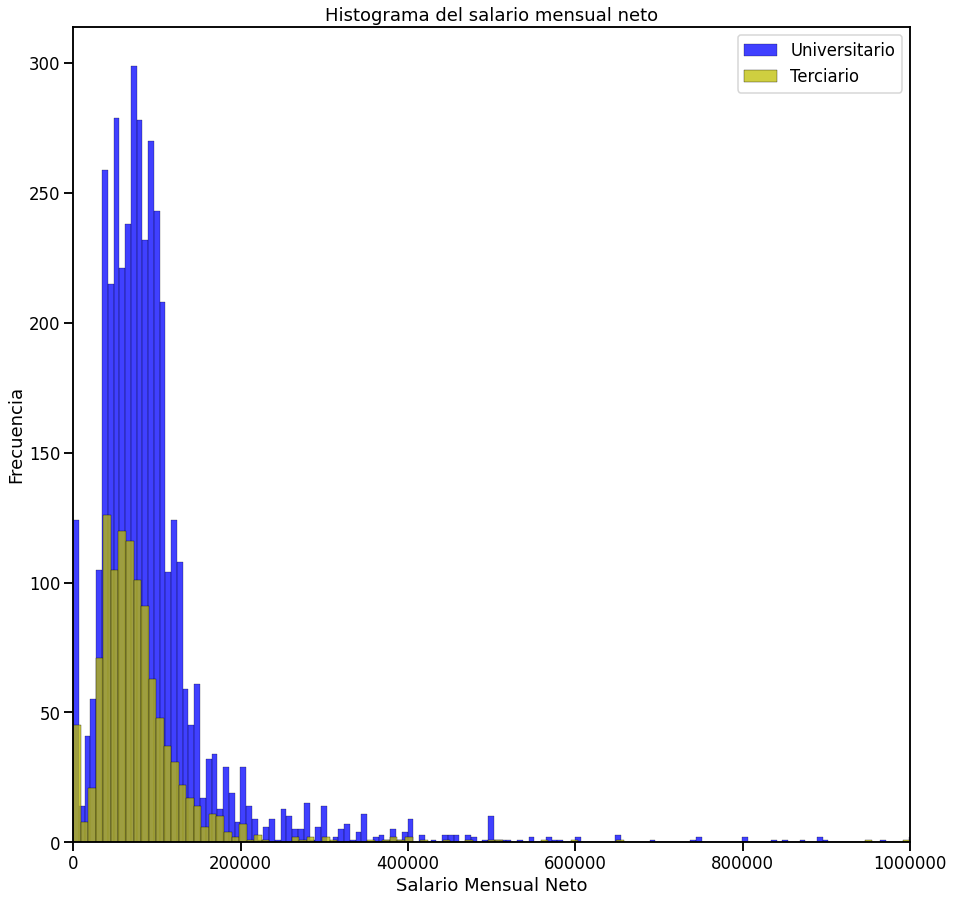

In [ ]:
filter_universitario = df[df.profile_studies_level == "Universitario"]["salary_monthly_NETO"]
filter_terciario = df[df.profile_studies_level == "Terciario"]["salary_monthly_NETO"]

plt.figure(figsize=(15,15))
seaborn.histplot(filter_universitario, label='Universitario', color='b')
seaborn.histplot(filter_terciario, label='Terciario', color='y') 
plt.title('Histograma del salario mensual neto')
plt.xlabel('Salario Mensual Neto')
plt.ylabel('Frecuencia')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlim([0,1000000])
plt.legend()
plt.show()

#### ¿Las variables salario mensual neto y nivel de estudio son independientes?

In [ ]:
#Lista de booleanos con True para valores de salario mensual neto mayor al promedio.
is_above_avg = df['salary_monthly_NETO'] > df.salary_monthly_NETO.mean()


In [ ]:
#Lista de booleanos con True para valores de nivel de estudio universitario.
is_universitario_or_terciario = (df['profile_studies_level'] == 'Universitario') #| (df['profile_studies_level'] == 'Terciario')


In [ ]:
#Probabilidad condicional, probabilidad que el salario mensual neto sea mayor al promedio
#debido a que el nivel de estudio sea universitario o terciario.
p_condicional= len(df[is_above_avg & is_universitario_or_terciario])/ len(df[is_universitario_or_terciario])

#Probabilidad que el salario mensual neto sea mayor al promedio.
p_above_avg = len(df[is_above_avg]) / len(df['salary_monthly_NETO'])


print("p_condicional:  "\
      + str(round(p_condicional,2)) + "\n")
print("p_above_avg: " + str(round(p_above_avg,2)))

p_condicional:  0.35

p_above_avg: 0.33


#### Respuesta:

La probabilidad que el salario mensual neto sea mayor al promedio es 0.33 mientras que la probabilidad que el salario mensual neto sea mayor al promedio dado que el nivel de estudios es universitario es de 0.35.

Por lo tanto ambos eventos no son independientes.

La conclusión a la que se llega es que estudios universitarios levemente aumentan la posibilidad de tener un salario mayor al promedio según los datos de la encuesta.




#### Medidas de centralización

In [ ]:
#Medidas de centralización

print("Medidas de centralización\n\n")

dictionary_universitario = {'Media':filter_universitario.mean(), 'Mediana': filter_universitario.median(), 'Moda': filter_universitario.mode()}
print("Nivel de estudio universitario:\n")
for i, j in dictionary_universitario.items():
  print(str(i) + ": $" + str(round(float(j))))
  
print("\n")

dictionary_terciario = {'Media':filter_terciario.mean(), 'Mediana': filter_terciario.median(), 'Moda': filter_terciario.mode()}
print("Nivel de estudio terciario:\n")
for i, j in dictionary_terciario.items():
  print(str(i) + ": $" + str(round(float(j))))

Medidas de centralización


Nivel de estudio universitario:

Media: $97410
Mediana: $80000
Moda: $80000


Nivel de estudio terciario:

Media: $80814
Mediana: $68000
Moda: $80000


Como se puede observar se tiene que estudios universitarios tienen una media de 20% más de salario que estudios terciarios.

Teniendo en cuenta la existencia de outliers y estos afectan la media, se propone la utilización de la mediana como medida estadística de comparación, se puede observar en los resultados que la diferencia en porcentaje se mantiene, ya que con un nivel universitario se tiene una mediana de aproximadamente \$80000, mientras que para estudios terciarios, una mediana de $68000.

Respecto a la moda, este valor permanece invariable ya que ese salario mensual neto se repite la mayor cantidad de veces tanto en personas con estudios universitarios como con estudios terciarios.


#### Medidas de dispersión

In [ ]:
#Medidas de dispersión

print("Medidas de dispersión\n\n")

dictionary2_universitario = {'Varianza':filter_universitario.var(), 'Desviación estándar': filter_universitario.std(), 'Coeficiente de Variación': filter_universitario.std()/filter_universitario.mean()}
print("Nivel de estudio universitario:\n")
for i, j in dictionary2_universitario.items():
    if j>2:
      print(str(i) + ": " + str(round(float(j))))
    else:
      print(str(i) + ": " + str(round(filter_universitario.std()/filter_universitario.mean(),3)))

print("\n")

dictionary2_terciario = {'Varianza':filter_terciario.var(), 'Desviación estándar': filter_terciario.std(), 'Coeficiente de Variación': filter_terciario.std()/filter_terciario.mean()}
print("Nivel de estudio terciario:\n")
for i, j in dictionary2_terciario.items():
    if j>2:
      print(str(i) + ": " + str(round(float(j))))
    else:
      print(str(i) + ": " + str(round(filter_terciario.std()/filter_terciario.mean(),3)))
  

Medidas de dispersión


Nivel de estudio universitario:

Varianza: 9812270024
Desviación estándar: 99057
Coeficiente de Variación: 1.017


Nivel de estudio terciario:

Varianza: 5335579585
Desviación estándar: 73045
Coeficiente de Variación: 0.904


Como se puede observar se calcularon la varianza, la desviación estándar y el coeficiente de variación, la primera de estas no tiene mucho sentido analizarla, ya que se va a analizar directamente la desviación estándar, como se puede leer se tiene que la desviación estándar del nivel de estudios universitarios es mayor y esto es esperable ya que se tiene 4 veces mayor cantidad de valores que el nivel terciario y por ende, se tiene mayor probabilidad que los valores se encuentren más alejados de la media.

En cuanto al coeficiente de variación, se puede observar que estan muy próximos al 1 lo que quiere decir que se tienen dos subpoblaciones dispersas y en el caso particular del nivel de estudio universitario que se tiene un valor mayor a 1, quiere decir que existen outliers que lo provocan.

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


#### Posibles variables numéricas.

In [ ]:
print('Posibles variables numéricas: \n')
for i in df.select_dtypes(['int64','float64']).columns:
  print(i)

Posibles variables numéricas: 

profile_age
profile_years_experience
work_years_in_company
work_years_in_current_position
work_people_in_charge_of
salary_on_call_duty_charge
salary_monthly_BRUTO
salary_monthly_NETO
salary_satisfaction
salary_comparison_last_semester
salary_percentage_inflation_adjustment_2020
salary_month_last_inflation_adjustment
company_recommended
company_diversity_policies


#### Posibles variables categóricas.

In [ ]:
print('Posibles variables categóricas: \n')
for i in df.select_dtypes(['object']).columns:
  print(i)

Posibles variables categóricas: 

profile_gender
work_country
work_province
profile_studies_level
profile_studies_level_state
profile_career
profile_university
profile_specialization_courses
profile_open_source_contributions
profile_programming_as_hobby
work_role
tools_platform
tools_programming_languages
tools_frameworks
tools_data_bases
tools_qa_testing
tools_IDEs
tools_work_pc_os
tools_cellphone_os
work_on_call_duty
work_on_call_duty_charge_type
work_contract_type
salary_in_usd
salary_has_bonus
salary_bonus_tied_to
salary_inflation_adjustment_2020
work_has_violence_situations
profile_sexual_orientation
profile_has_disabilities
profile_has_disabilities_hiring_difficulties
company_employee_number
company_main_activity
company_extra_benefits
company_best_companies_city


#### Elección de variables

Variables numéricas:

*   work_years_in_company
*   profile_years_experience

Variable categórica:

*   salary_in_usd     



#### Se estudia la dispersión con un gráfico scatterplot

Text(0, 0.5, 'Años de trabajo en la compañía')

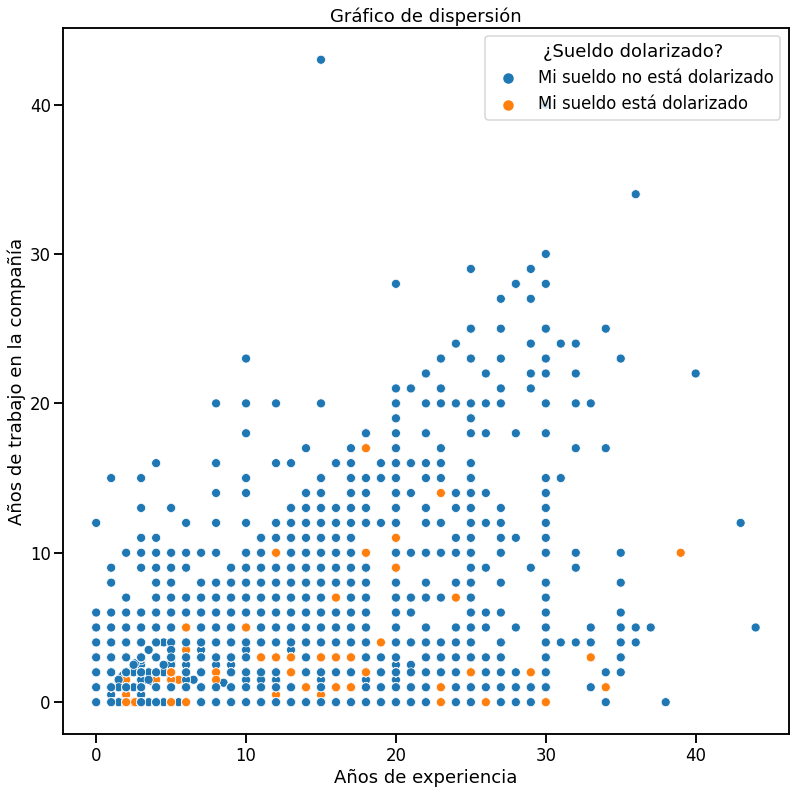

In [ ]:
plt.figure(figsize = [13,13])
seaborn.scatterplot(data=df[df.profile_years_experience < 70], y='work_years_in_company',
                  x='profile_years_experience', hue='salary_in_usd').legend(title='¿Sueldo dolarizado?')
plt.title('Gráfico de dispersión')
plt.xlabel('Años de experiencia')
plt.ylabel('Años de trabajo en la compañía')

#### Conclusiones



*   Primeramente se puede observar que los valores que están por encima de la línea de 45°, se pueden suponer como erróneos, ya que no se puede tener más años en la compañía que años de experiencia total.

  Otro análisis para abordar esta situación es que puede deberse a personas que trabajaban en la compañía en otro puesto no relacionado a sistemas antes de tener el actual.

  Para descartar valores erróneos, se puede analizar la edad de las personas, de esta manera se podría sacar los valores que impliquen experiencia de trabajo a una edad menor de los 18 años.

*   El segundo punto a tener en cuenta, son los valores que se encuentran debajo de la línea de 45°, esto implica que la mayoría de las personas encuestadas no tienen como primer trabajo el puesto actual.

*   Siguiendo con el abordaje a partir de la línea de 45°, se tiene que los valores que se encuentran sobre la misma, son mucho menos, como en el análisis anterior implica que son pocas las personas que permanecen en su primer trabajo.

*  El cuarto punto a tener en cuenta es la variable categórica, se va a hacer foco en los sueldos dolarizados, se puede observar que la mayoría de los sueldos dolarizados corresponden a personas que tienen entre 5 y 20 años de experiencia.

*  El quinto y último punto a analizar es que todas las personas encuestadas con salario en dólares tienen como mínimo 2 años de experiencia laboral.




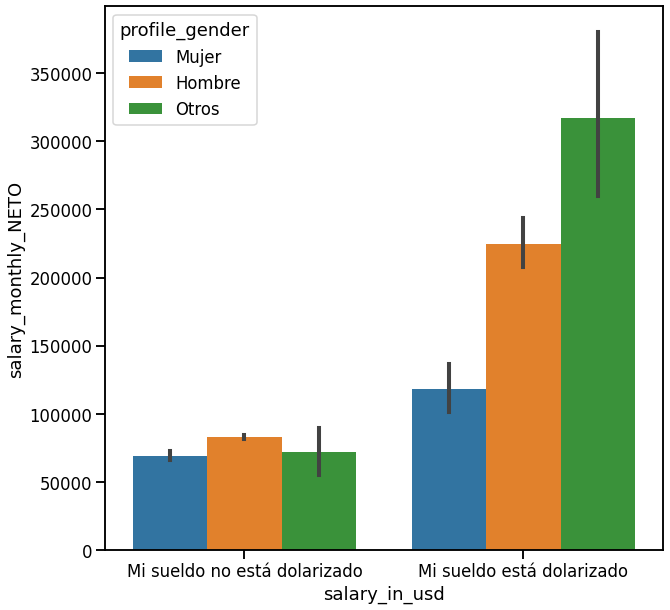

In [ ]:
plt.figure(figsize=(10,10))
seaborn.barplot(x="salary_in_usd", y="salary_monthly_NETO", hue="profile_gender", data=df)